$\textbf{PROGRAMMING ASSIGNMENT - Lecture 8}$
---

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. Make use of what you learned with decision trees.

---
Data: [Page Blocks Classification](https://archive.ics.uci.edu/dataset/78/page+blocks+classification)

In [81]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

### $\textbf{Exploratory Data Analysis}$

In [82]:
page_blocks_classification = fetch_ucirepo(id=78)
page_blocks_classification.variables

,name,role,type,demographic,description,units,missing_values
0,height,Feature,Integer,None,Height of the block,None,no
1,length,Feature,Integer,None,Length of the block,None,no
2,area,Feature,Integer,None,Area of the block (height * length),None,no
3,eccen,Feature,Continuous,None,Eccentricity of the block (length / height),None,no
4,p_black,Feature,Continuous,None,Percentage of black pixels within the block (b...,None,no
5,p_and,Feature,Continuous,None,Percentage of black pixels after the applicati...,None,no
6,mean_tr,Feature,Continuous,None,Mean number of white-black transitions (blackp...,None,no
7,blackpix,Feature,Integer,None,Total number of black pixels in the original b...,None,no
8,blackand,Feature,Integer,None,Total number of black pixels in the bitmap of ...,None,no
9,wb_trans,Feature,Integer,None,Number of white-black transitions in the origi...,None,no


In [83]:
page_blocks_classification.data.features.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4


In [84]:
page_blocks_classification.data.targets.head()

,class
0,1
1,1
2,1
3,1
4,1


In [85]:
df = pd.merge(page_blocks_classification.data.features, page_blocks_classification.data.targets, left_index=True, right_index=True)
df.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [86]:
df.isna().sum()

height      0
length      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
class       0
dtype: int64

In [87]:
df.describe()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891,1.202631
std,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362,0.721470
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000,1.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height    5473 non-null   int64  
 1   length    5473 non-null   int64  
 2   area      5473 non-null   int64  
 3   eccen     5473 non-null   float64
 4   p_black   5473 non-null   float64
 5   p_and     5473 non-null   float64
 6   mean_tr   5473 non-null   float64
 7   blackpix  5473 non-null   int64  
 8   blackand  5473 non-null   int64  
 9   wb_trans  5473 non-null   int64  
 10  class     5473 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 470.5 KB


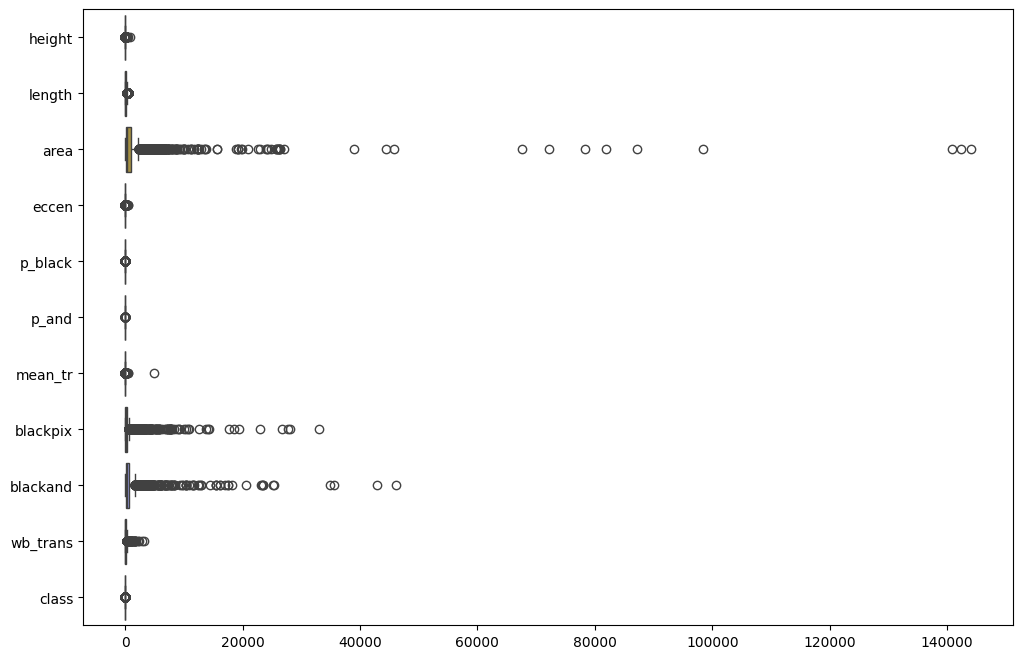

In [89]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.show()

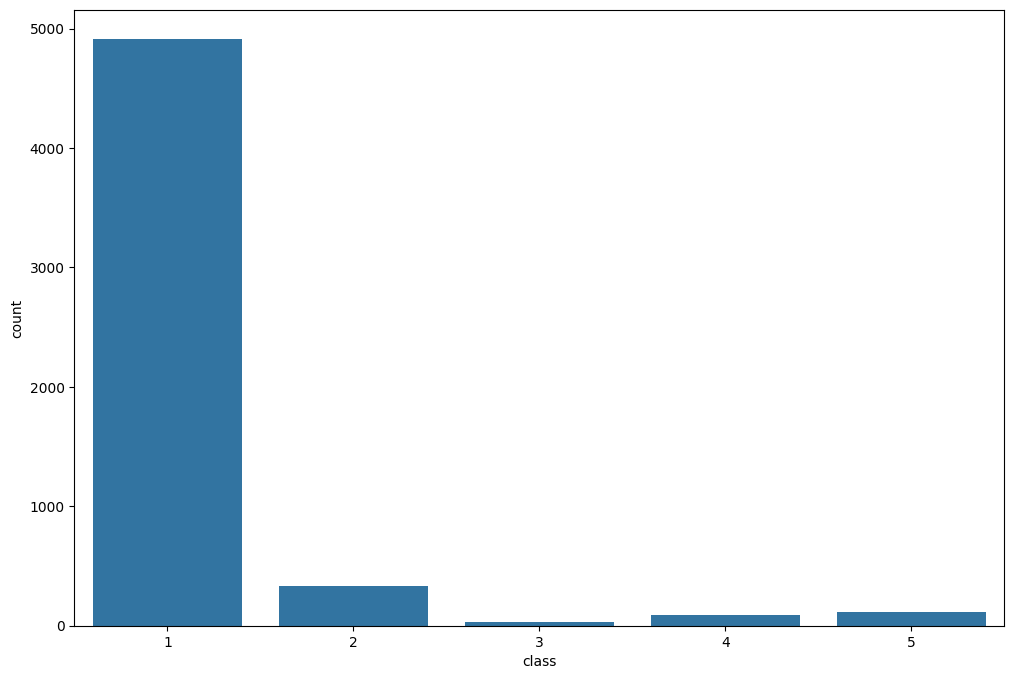

In [90]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="class")
plt.show()

<Figure size 1200x800 with 0 Axes>

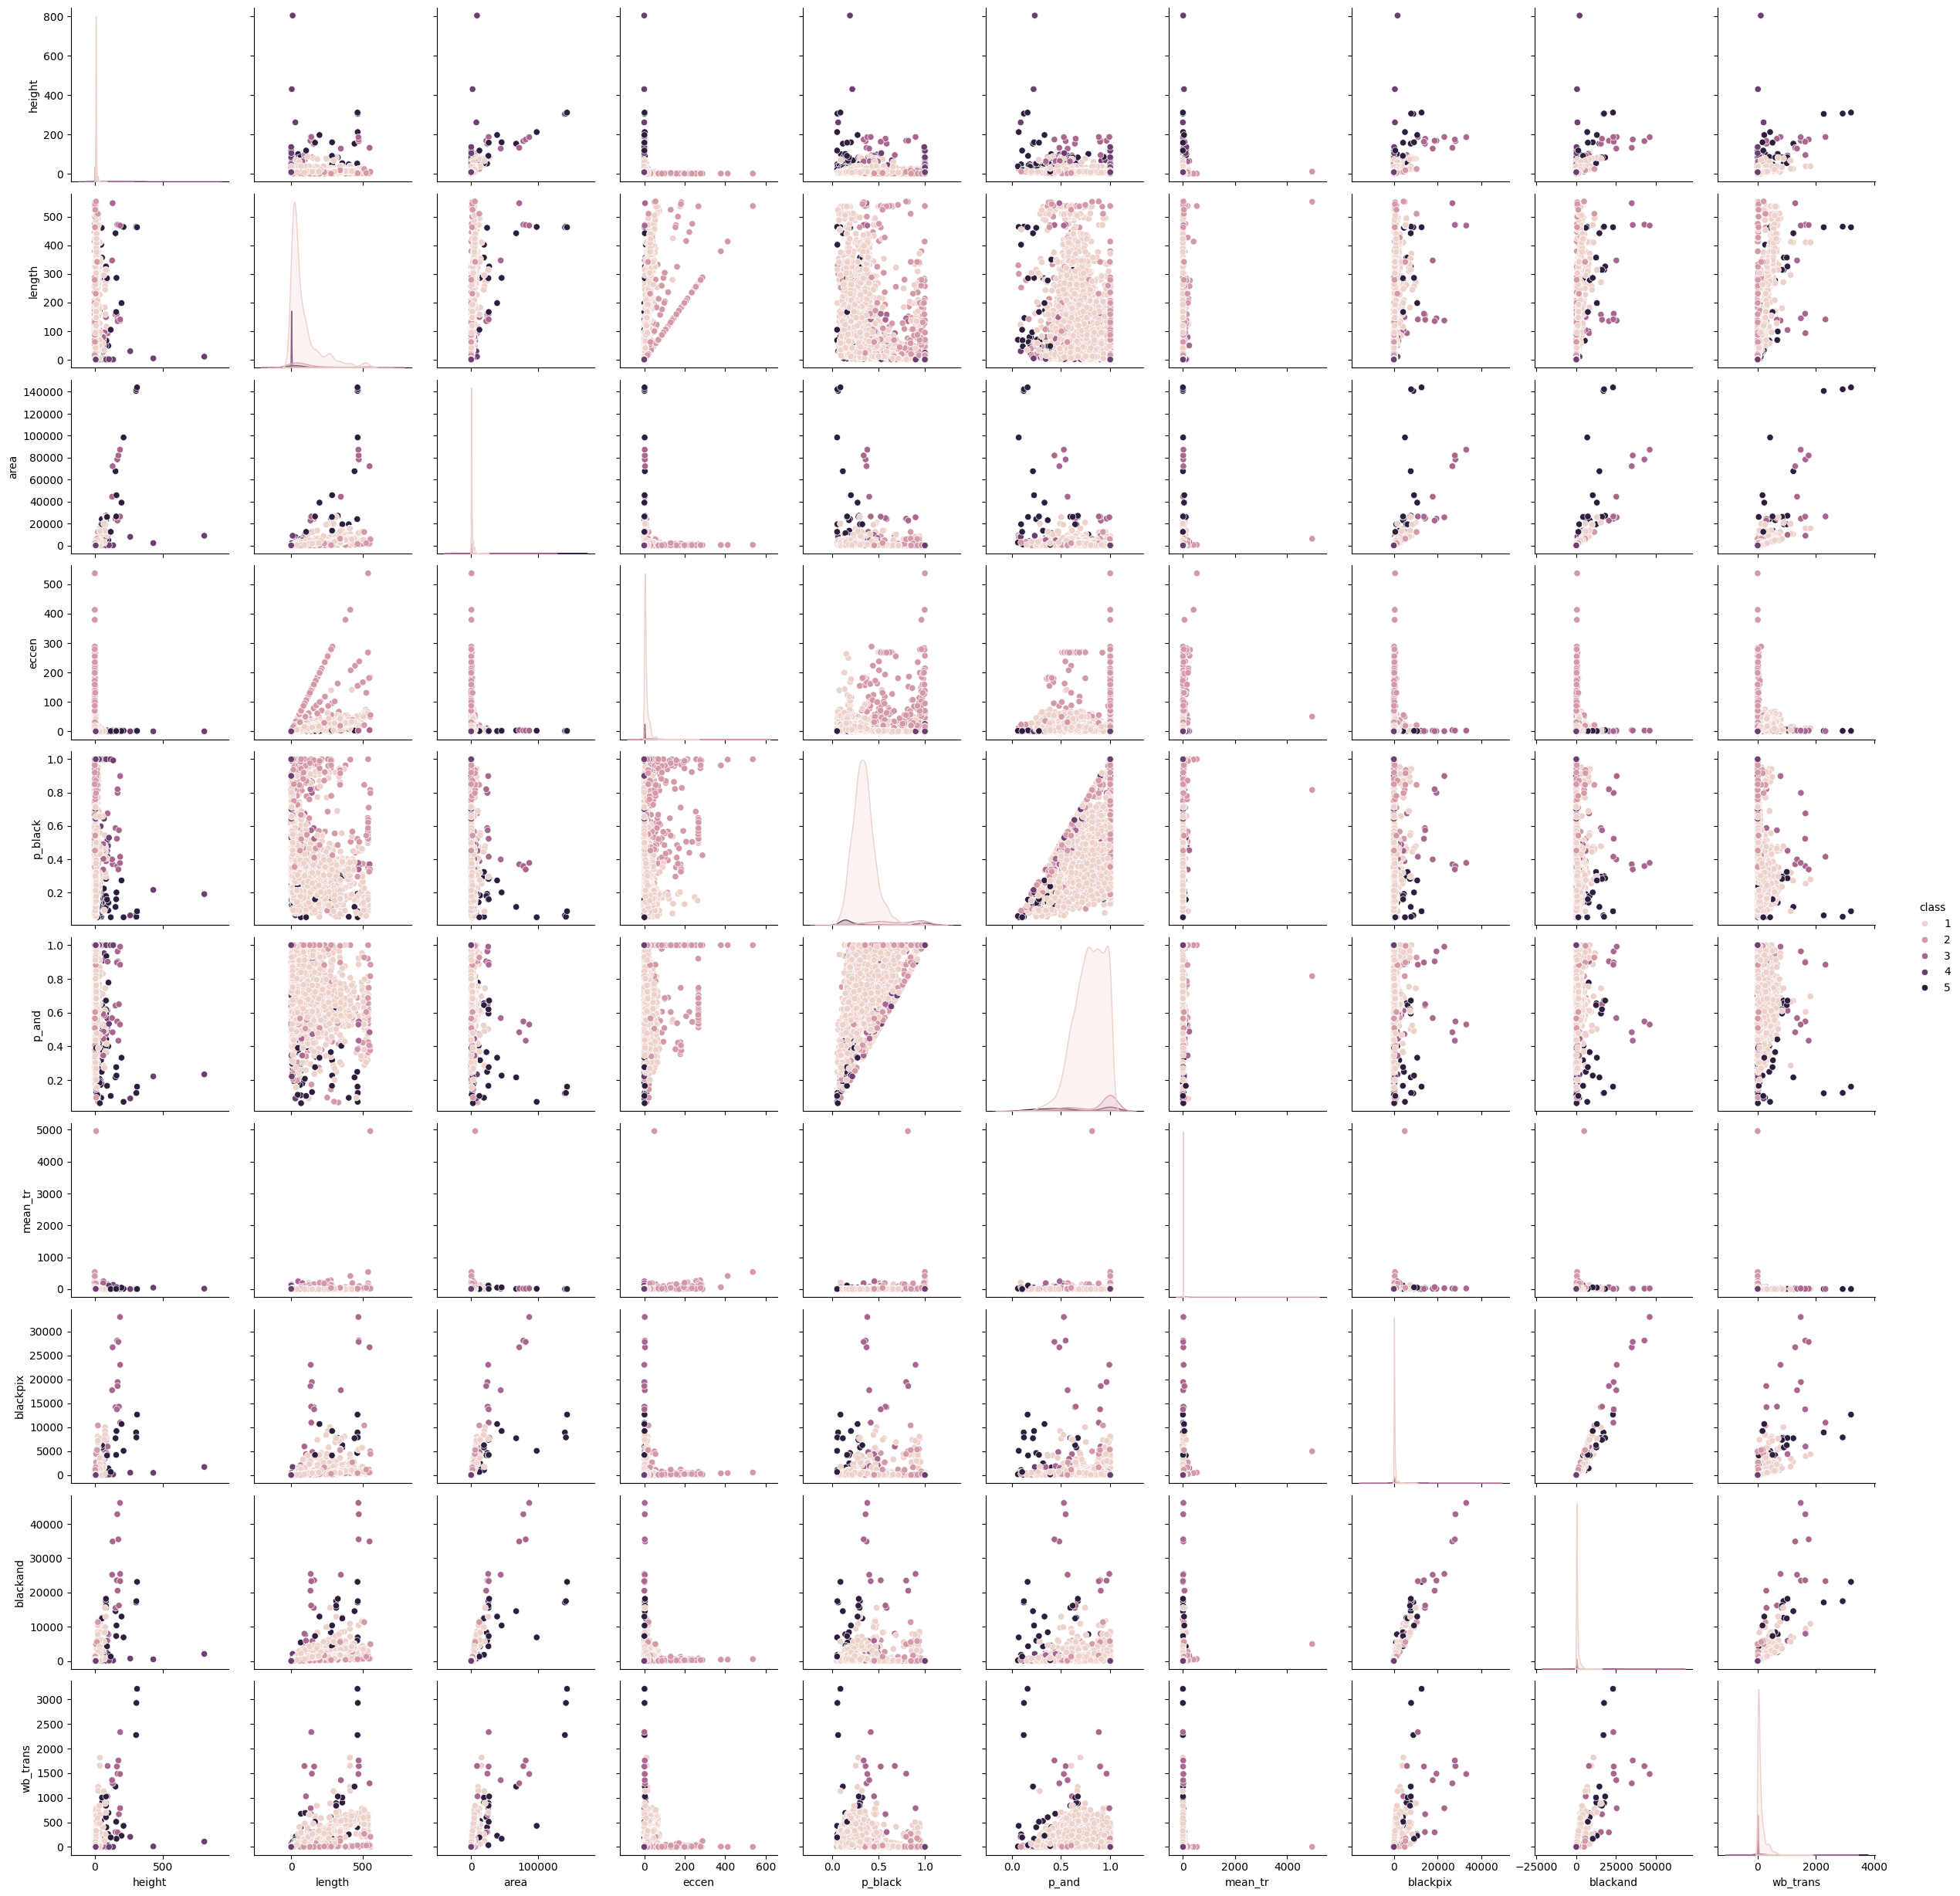

In [91]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue="class")
plt.show()

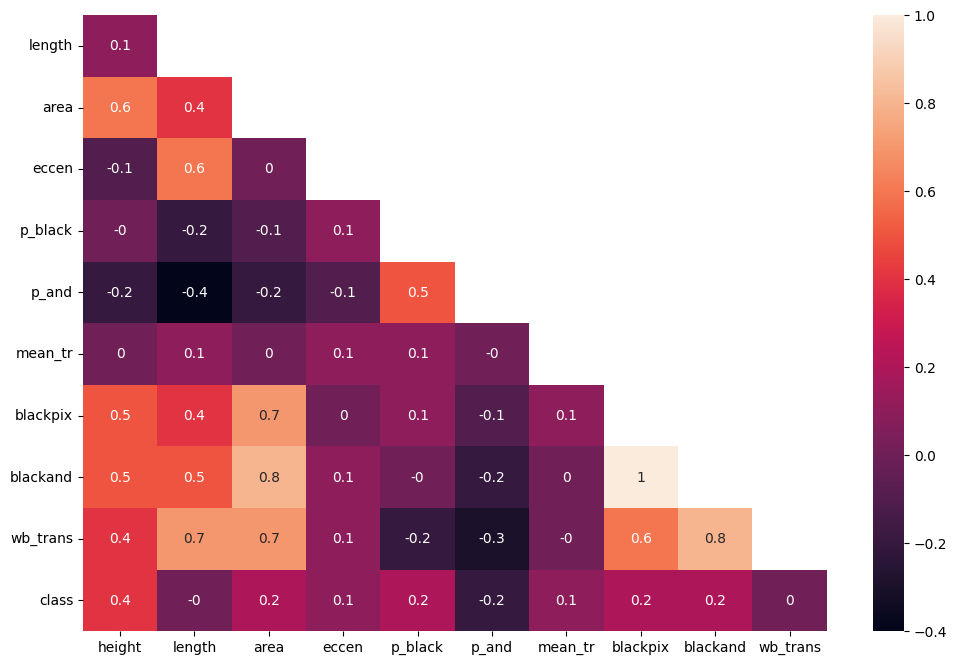

In [92]:
corr = df.corr().round(1)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 8))
sns.heatmap(corr.mask(mask).dropna(how='all').dropna(how='all', axis=1), annot=True)
plt.show()

### $\textbf{Training-Testing Split}$

In [93]:
X = df.drop(columns="class")
y = df["class"]

In [94]:
X.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4


In [95]:
y.value_counts()

class
1    4913
2     329
5     115
4      88
3      28
Name: count, dtype: int64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069)
X_train.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
598,8,12,96,1.500,0.469,1.000,1.61,45,96,28
1066,7,14,98,2.000,0.490,0.939,2.53,48,92,19
2933,6,17,102,2.833,0.451,0.745,2.56,46,76,18
3404,8,39,312,4.875,0.304,0.756,1.38,95,236,69
4191,13,45,585,3.462,0.429,0.566,6.61,251,331,38


In [97]:
X_test.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
501,9,37,333,4.111,0.390,0.811,2.03,130,270,64
1194,5,43,215,8.600,0.265,0.786,1.33,57,169,43
3507,8,344,2752,43.000,0.216,0.838,1.22,595,2307,486
4912,6,97,582,16.167,0.232,0.852,1.55,135,496,87
1842,7,32,224,4.571,0.277,0.830,1.41,62,186,44


In [98]:
y_train.value_counts()

class
1    3929
2     261
5      95
4      74
3      19
Name: count, dtype: int64

In [99]:
y_test.value_counts()

class
1    984
2     68
5     20
4     14
3      9
Name: count, dtype: int64

### $\textbf{Decision Tree Classifier}$

In [100]:
tree_classifier = DecisionTreeClassifier(random_state=42069)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42069)

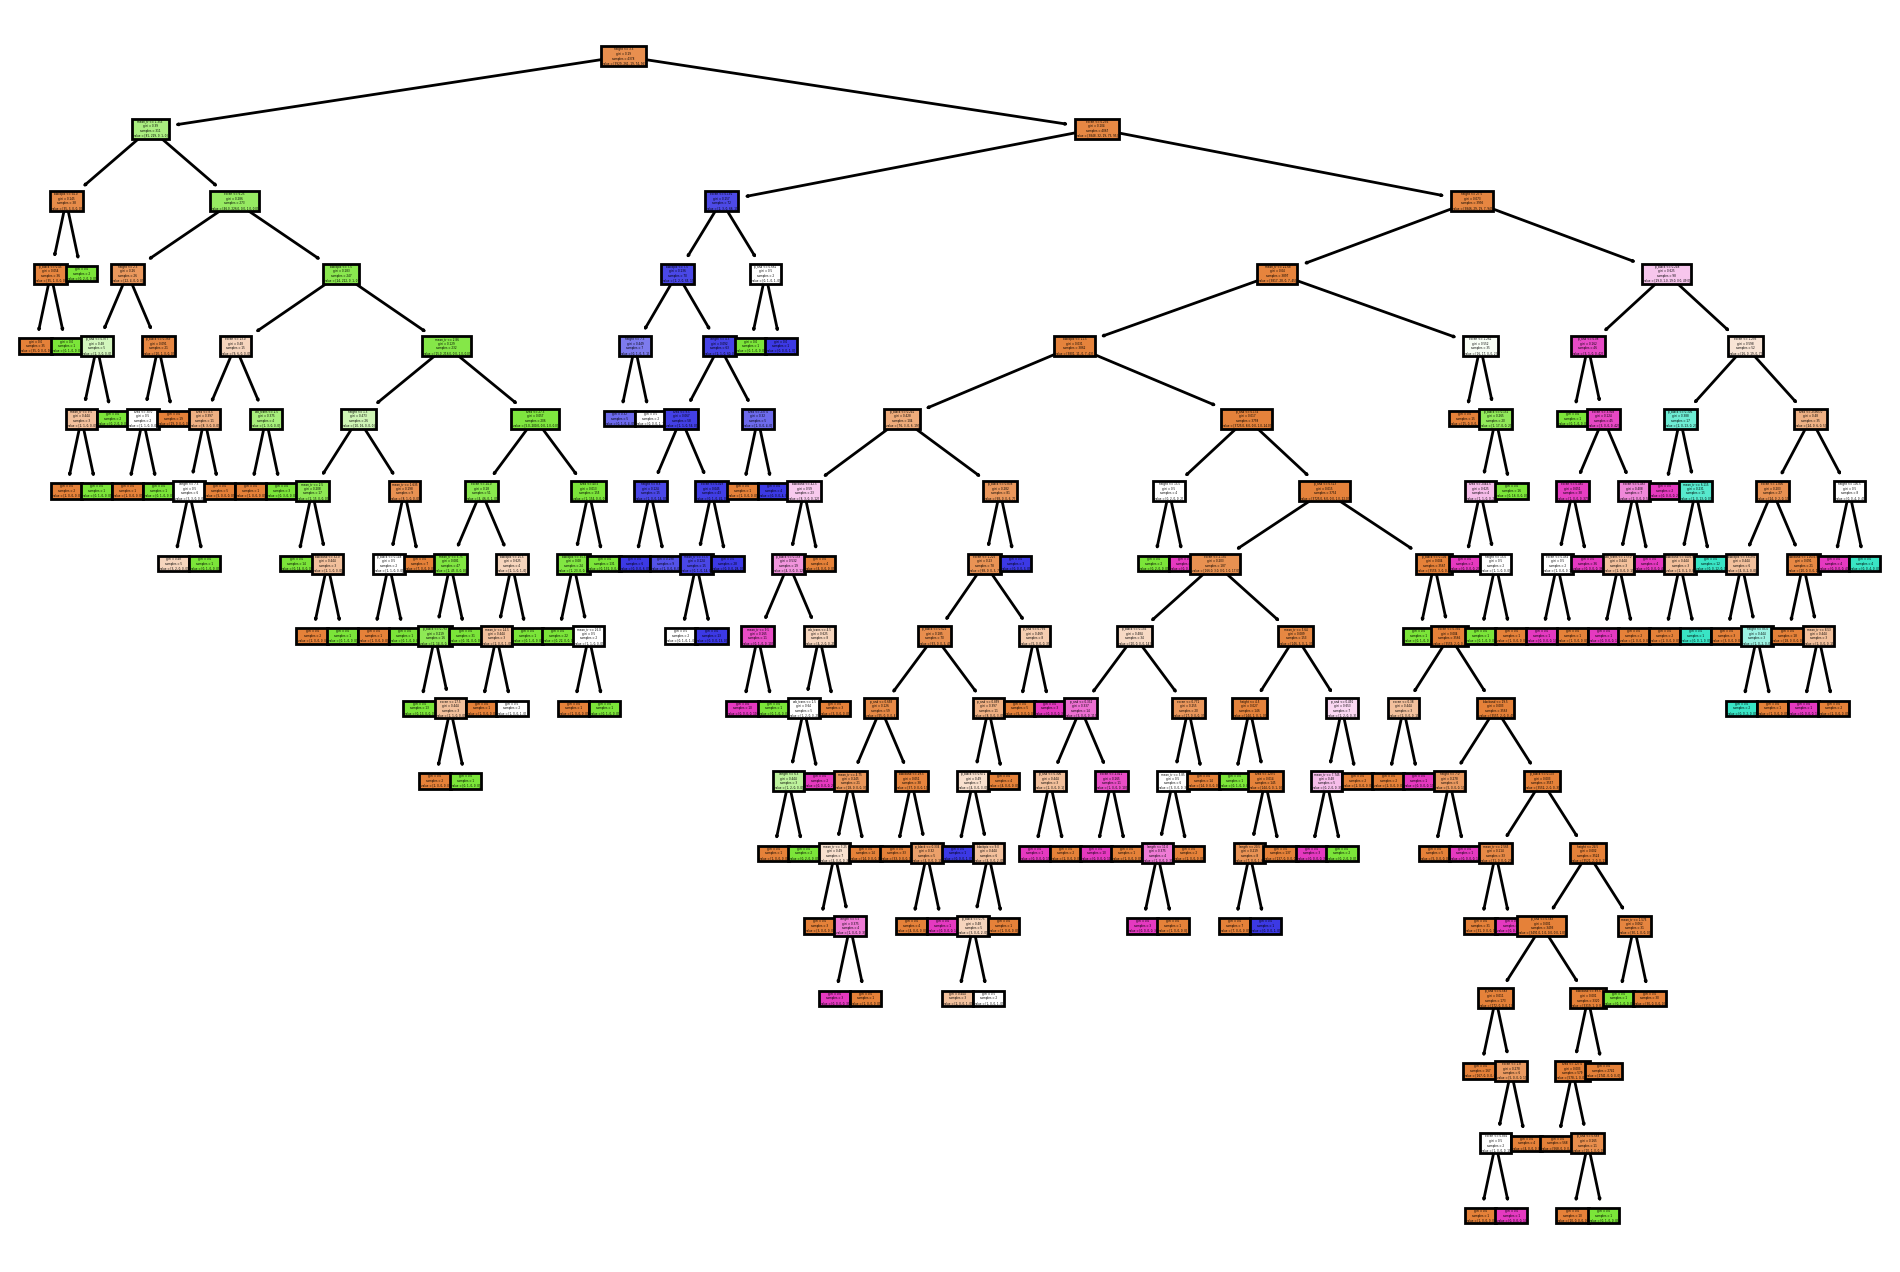

In [101]:
plt.figure(figsize=(12, 8), dpi=200)
plot_tree(tree_classifier, filled=True, feature_names=X.columns)
plt.show()

In [102]:
tree_classifier.feature_importances_

array([0.46549109, 0.00847388, 0.01688679, 0.2403672 , 0.07708316,
       0.03126492, 0.11156607, 0.03198307, 0.00897518, 0.00790864])

In [103]:
feature_importance = pd.DataFrame(index=X.columns, data=tree_classifier.feature_importances_, columns=['Feature Importance'])
feature_importance

,Feature Importance
height,0.465491
length,0.008474
area,0.016887
eccen,0.240367
p_black,0.077083
p_and,0.031265
mean_tr,0.111566
blackpix,0.031983
blackand,0.008975
wb_trans,0.007909


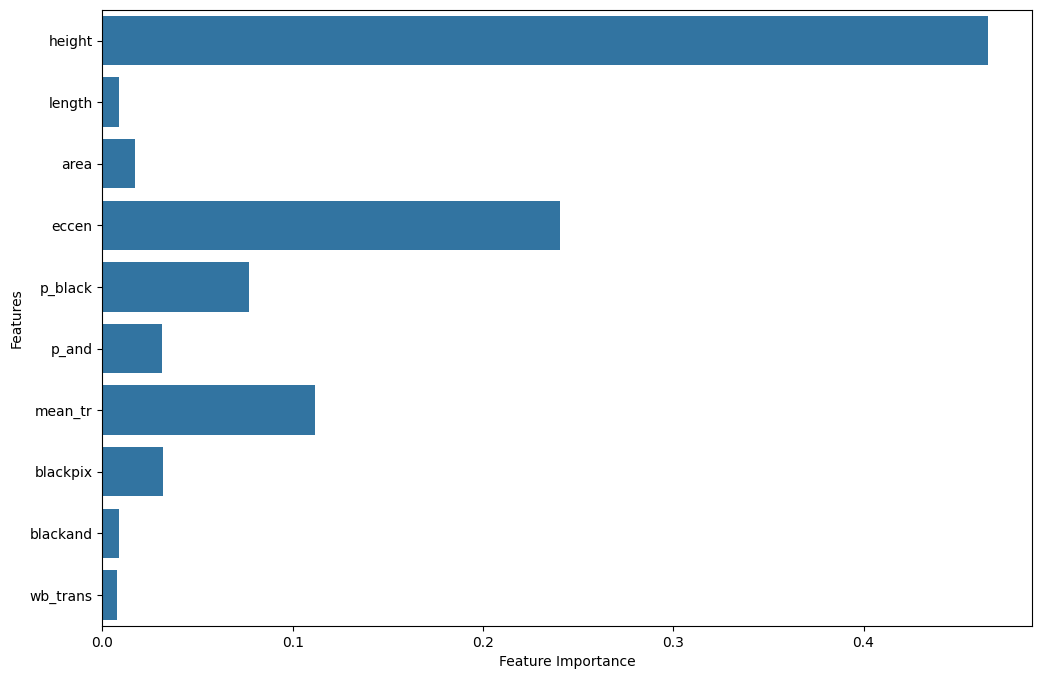

In [104]:
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='Feature Importance', y=feature_importance.index)
plt.ylabel("Features")
plt.show()

In [105]:
y_pred = tree_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       984
           2       0.81      0.85      0.83        68
           3       0.90      1.00      0.95         9
           4       0.76      0.93      0.84        14
           5       0.62      0.50      0.56        20

    accuracy                           0.96      1095
   macro avg       0.82      0.85      0.83      1095
weighted avg       0.96      0.96      0.96      1095



### $\textbf{Hyper Parameter Tuning}$

In [106]:
tree_classifier = DecisionTreeClassifier(random_state=42069)
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 20)
}

grid_cv = GridSearchCV(tree_classifier, param_grid=tree_params, cv=5)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42069),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [107]:
grid_cv.best_params_

{'criterion': 'gini', 'max_depth': 6}

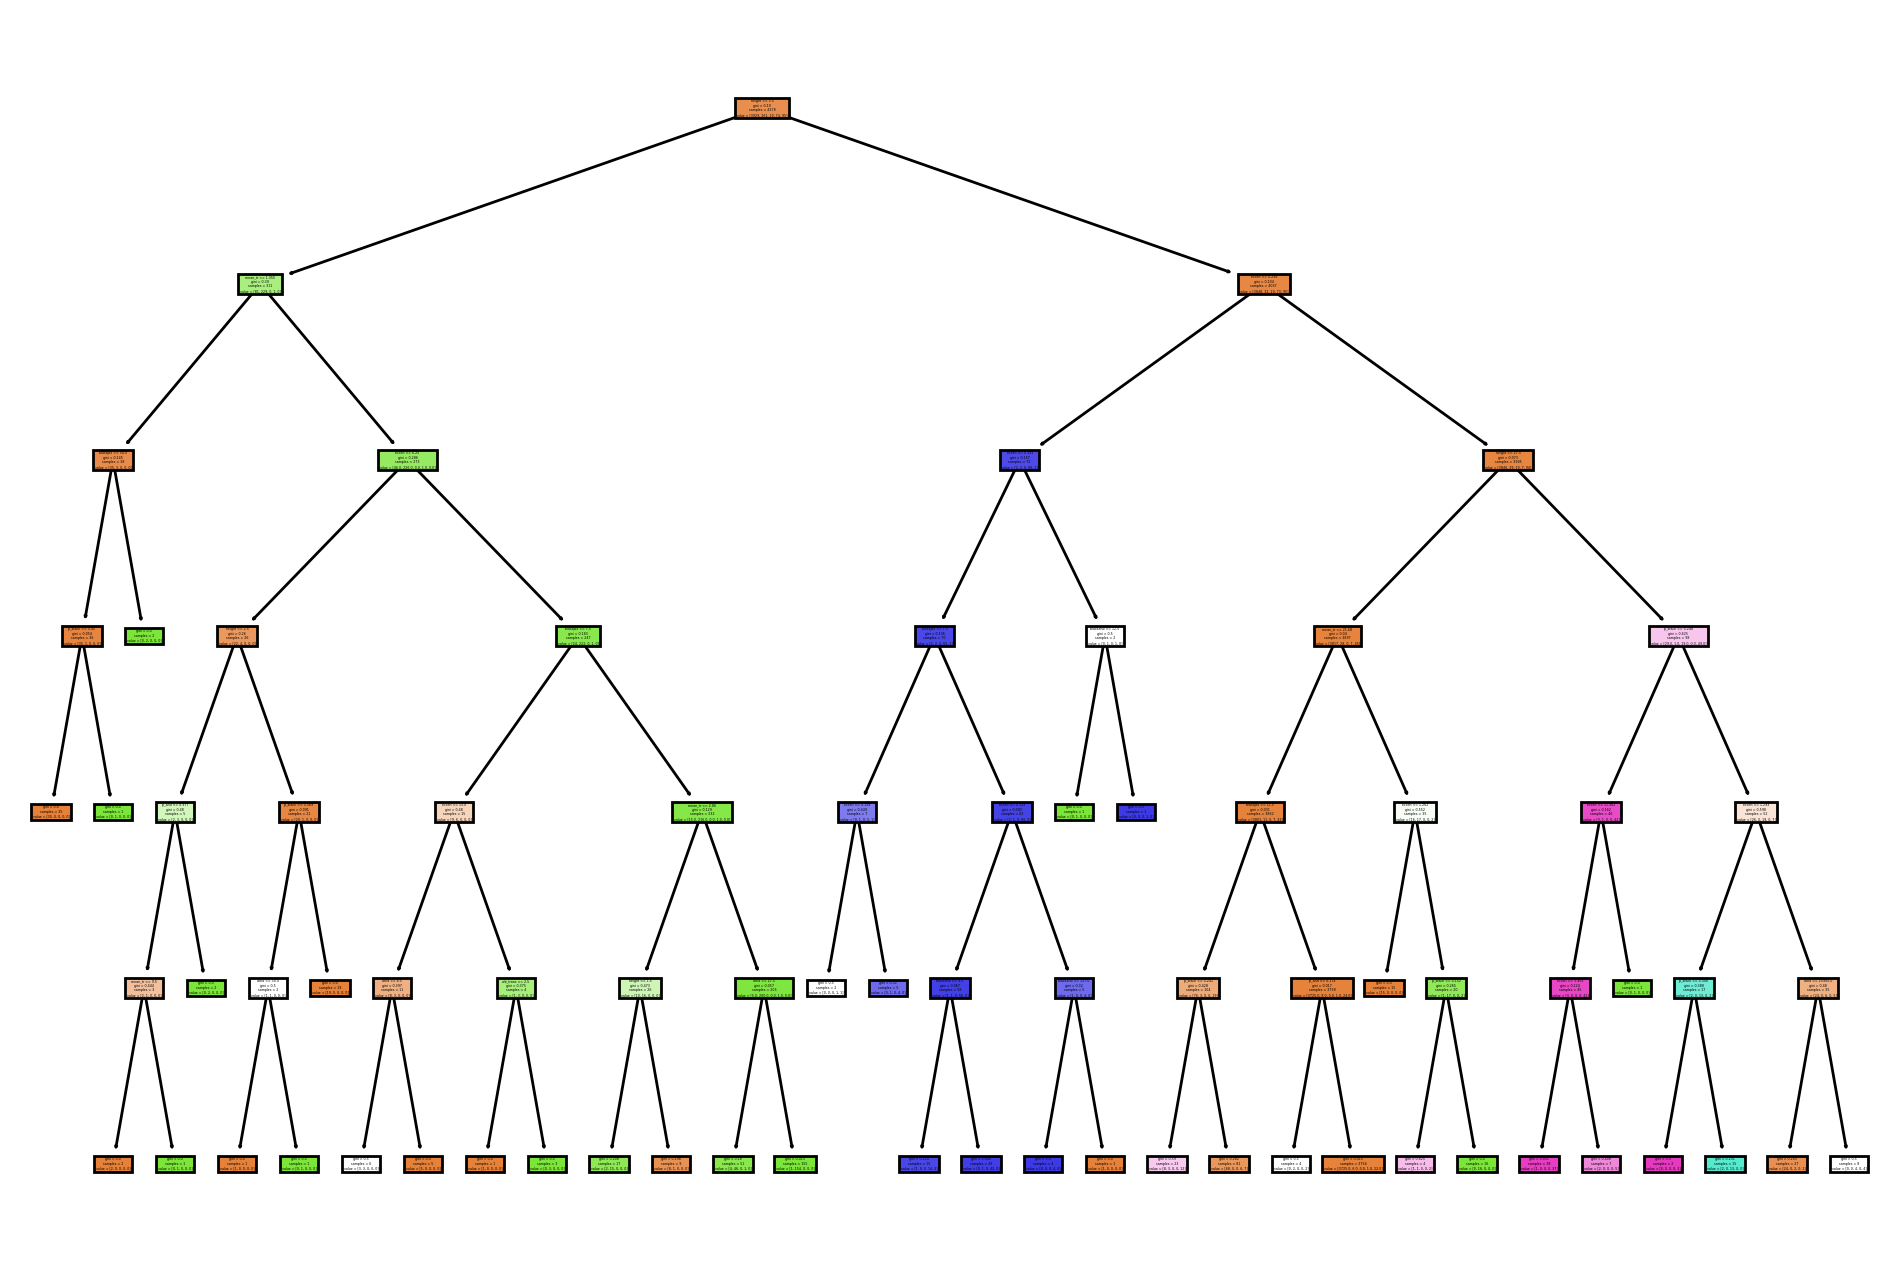

In [108]:
plt.figure(figsize=(12, 8), dpi=200)
plot_tree(grid_cv.best_estimator_, filled=True, feature_names=X.columns)
plt.show()

In [109]:
grid_cv.best_estimator_.feature_importances_

array([0.53549641, 0.        , 0.01479128, 0.2528832 , 0.05728741,
       0.01008868, 0.09068636, 0.0327208 , 0.00387442, 0.00217144])

In [110]:
feature_importance = pd.DataFrame(index=X.columns, data=grid_cv.best_estimator_.feature_importances_, columns=['Feature Importance'])
feature_importance

,Feature Importance
height,0.535496
length,0.000000
area,0.014791
eccen,0.252883
p_black,0.057287
p_and,0.010089
mean_tr,0.090686
blackpix,0.032721
blackand,0.003874
wb_trans,0.002171


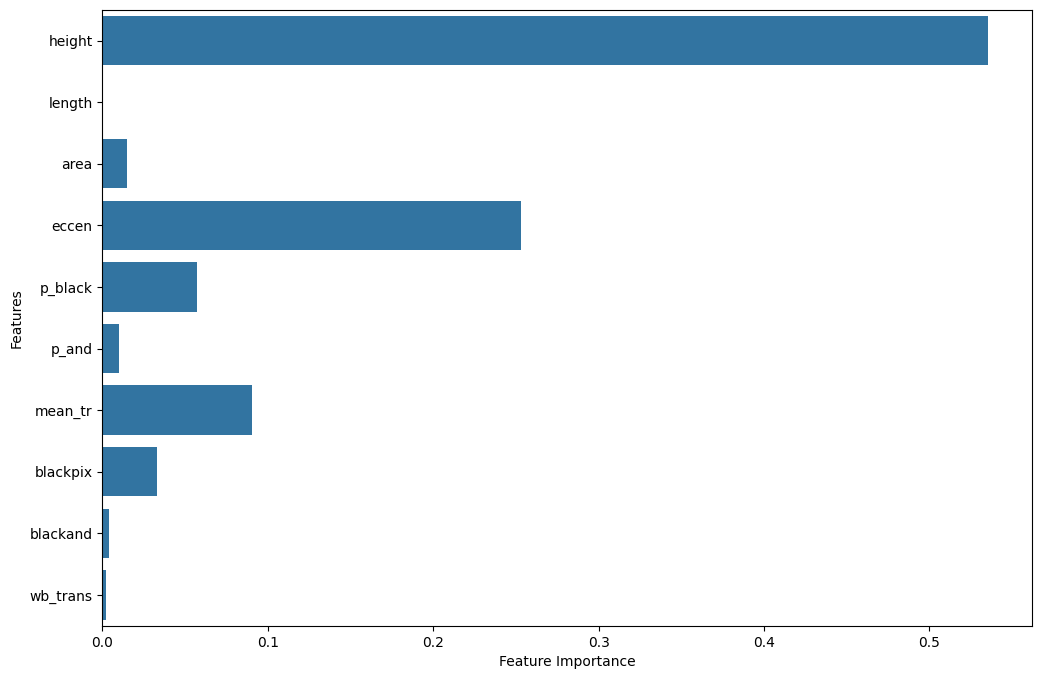

In [111]:
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='Feature Importance', y=feature_importance.index)
plt.ylabel("Features")
plt.show()

### $\textbf{Performance Evaluation}$

In [112]:
best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.98      0.98       984
           2       0.87      0.90      0.88        68
           3       0.90      1.00      0.95         9
           4       0.82      1.00      0.90        14
           5       0.62      0.50      0.56        20

    accuracy                           0.97      1095
   macro avg       0.84      0.88      0.85      1095
weighted avg       0.97      0.97      0.97      1095



In [114]:
confusion_matrix(y_test, y_pred)

array([[968,   9,   1,   1,   5],
       [  5,  61,   0,   1,   1],
       [  0,   0,   9,   0,   0],
       [  0,   0,   0,  14,   0],
       [  9,   0,   0,   1,  10]])

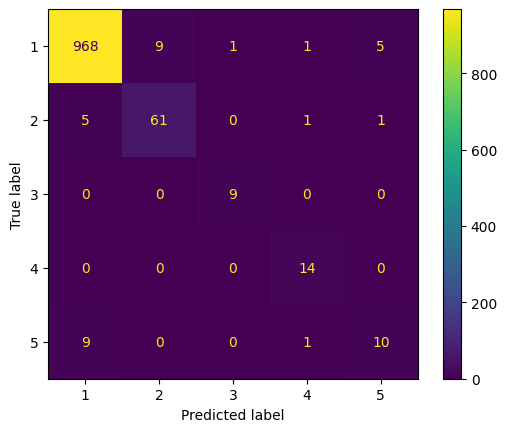

In [115]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

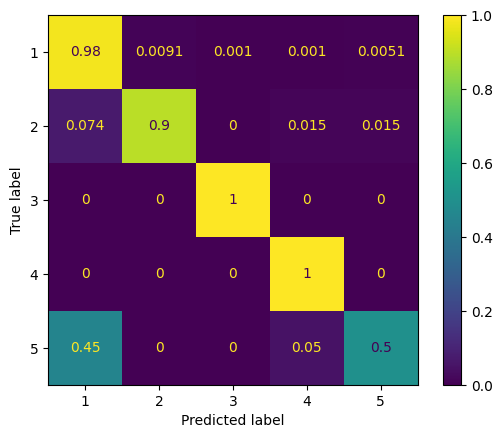

In [116]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, normalize='true')

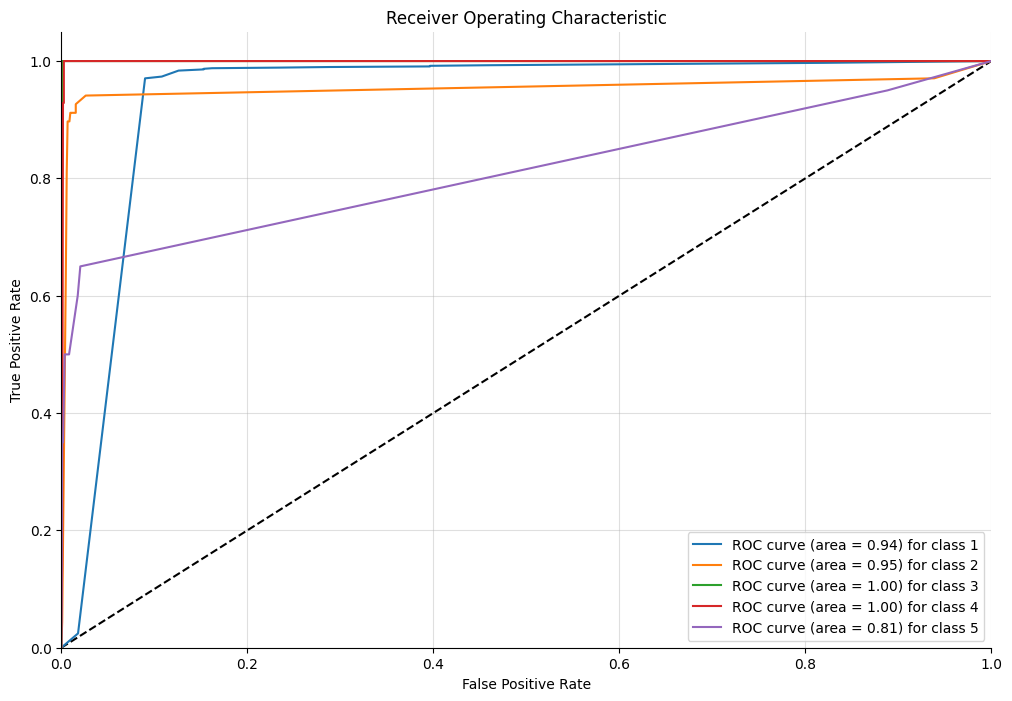

In [117]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
y_score = grid_cv.best_estimator_.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(y_test_dummies[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, ax = plt.subplots(figsize=(12,8))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')

for i in range(len(y_test_dummies[0])):
    ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i] if not np.isnan(roc_auc[i]) else 0:.2f}) for class {i + 1}')

ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()